# CDDP Tutorial (2D Car)

This tutorial runs a simple example of the constrained differential dynamic programming algorithm on 2-dimnensional vehicle problem.

In [ ]:
# If needed, run the following lines:
using Pkg
Pkg.precompile()

In [1]:
using Plots; gr(legend=true,dpi=800); 
using LinearAlgebra
using BenchmarkTools
using Printf
using Revise
using CDDP

In [2]:
includet("../src/models/Car.jl")
model = Car2D()
x_dim, u_dim = model.x_dim, model.u_dim
;

In [3]:
tf = model.tf
tN = model.tN
dt = model.dt;

In [4]:
x_init = model.x_init
x_final = model.x_final;

In [10]:
function ell_cost(
    x::Vector,
    u::Vector,
    x_ref::Vector{Float64};
)
    Q = zeros(size(x,1), size(x,1))
    R = Diagonal([0.05; 0.05])
    return  transpose(x - x_ref) * Q * (x - x_ref) + 0.5 * transpose(u) * R * u
end

function phi_cost(
    x::Vector,
    x_final::Vector{Float64};
)
    Qf = Diagonal([50; 50; 50; 10])
    return 0.5 * transpose(x - x_final) * Qf * (x - x_final)
end
;

In [23]:
prob = iLQRProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing);

In [36]:
sol = solve_ilqr(prob, reg_param1=0.001, reg_param1_fact=1.0,reg_param2=0.001, reg_param2_fact=1.0, max_ite=30)
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_ilqr_, U_ilqr_, J_ilqr_, gains_ilqr_ = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start iLQR Problem Solver 
**************************************************************************************
iter    objective 
                
0       561.685028,  
                
1       162.447710,  
                
2       22.649525,  
                
3       5.339818,  
                


4       1.631176,  
                
5       1.513048,  
                
6       1.489806,  
                
7       1.485028,  
                
8       1.483909,  
                
9       1.483617,  
                
iter    objective 
                
10       1.483549,  
                
11       1.483538,  
                
**************************************************************************************
>>> Successfully Finished iLQR Problem Solver <<< 
**************************************************************************************


In [60]:
x_final = [3.0; 3.0; pi/2; 0.0]
prob = iLQRProblem(model, tf, tN, dt, x_dim, u_dim, ell_cost, phi_cost, model.f!, x_init, x_final, nothing);
sol = solve_ilqr(prob, X=X_ilqr_, U=U_ilqr_, reg_param1=0.001, reg_param1_fact=1.0,reg_param2=0.001, reg_param2_fact=1.0, max_ite=30)
X, U, J, gains = sol.X, sol.U, sol.J, sol.gains;
X_ilqr, U_ilqr, J_ilqr, gains_ilqr = sol.X, sol.U, sol.J, sol.gains;

**************************************************************************************
>>> Start iLQR Problem Solver 
**************************************************************************************
iter    objective 
                
0       51.376482,  
                
1       1.318655,  
                
2       1.254040,  
                
3       1.249663,  
                
4       1.249160,  
                
**************************************************************************************
>>> Successfully Finished iLQR Problem Solver <<< 
**************************************************************************************


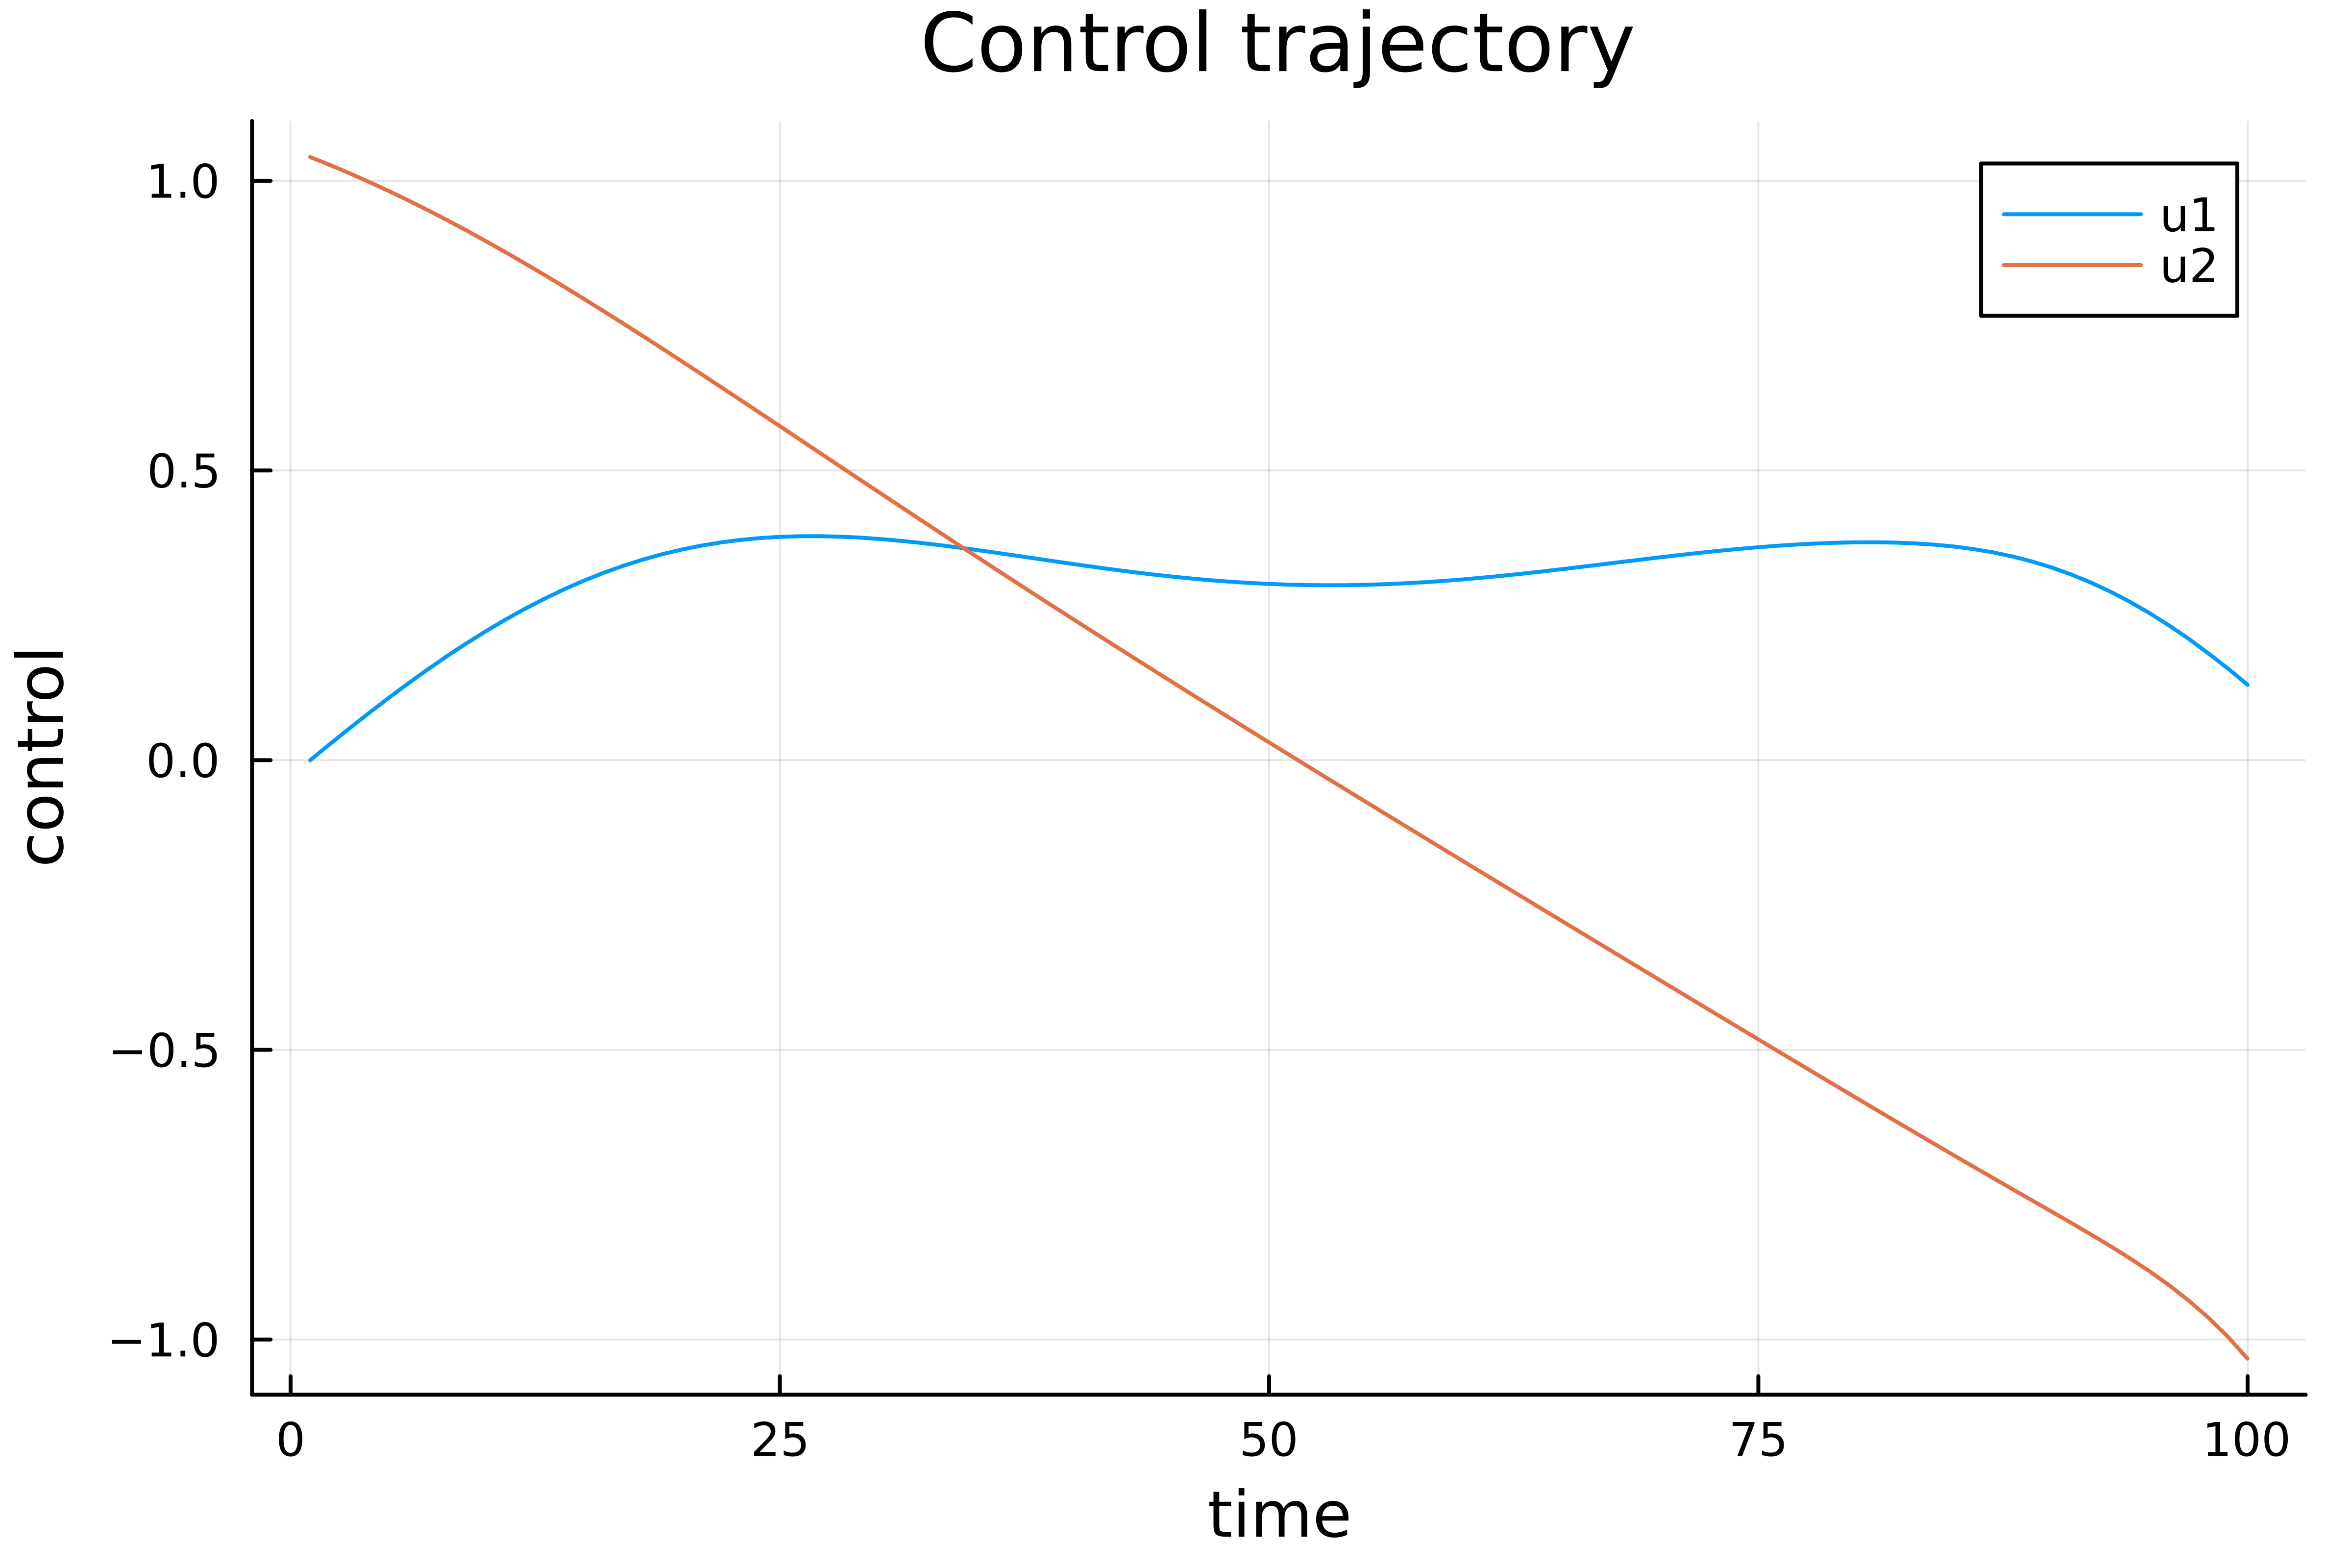

In [52]:
U_arr = zeros(tN, u_dim)
for k in 0:tN-1
    U_arr[k+1,:] = U(k*dt)
end
plot(U_arr, label=["u1" "u2"], xlabel="time", ylabel="control", title="Control trajectory")

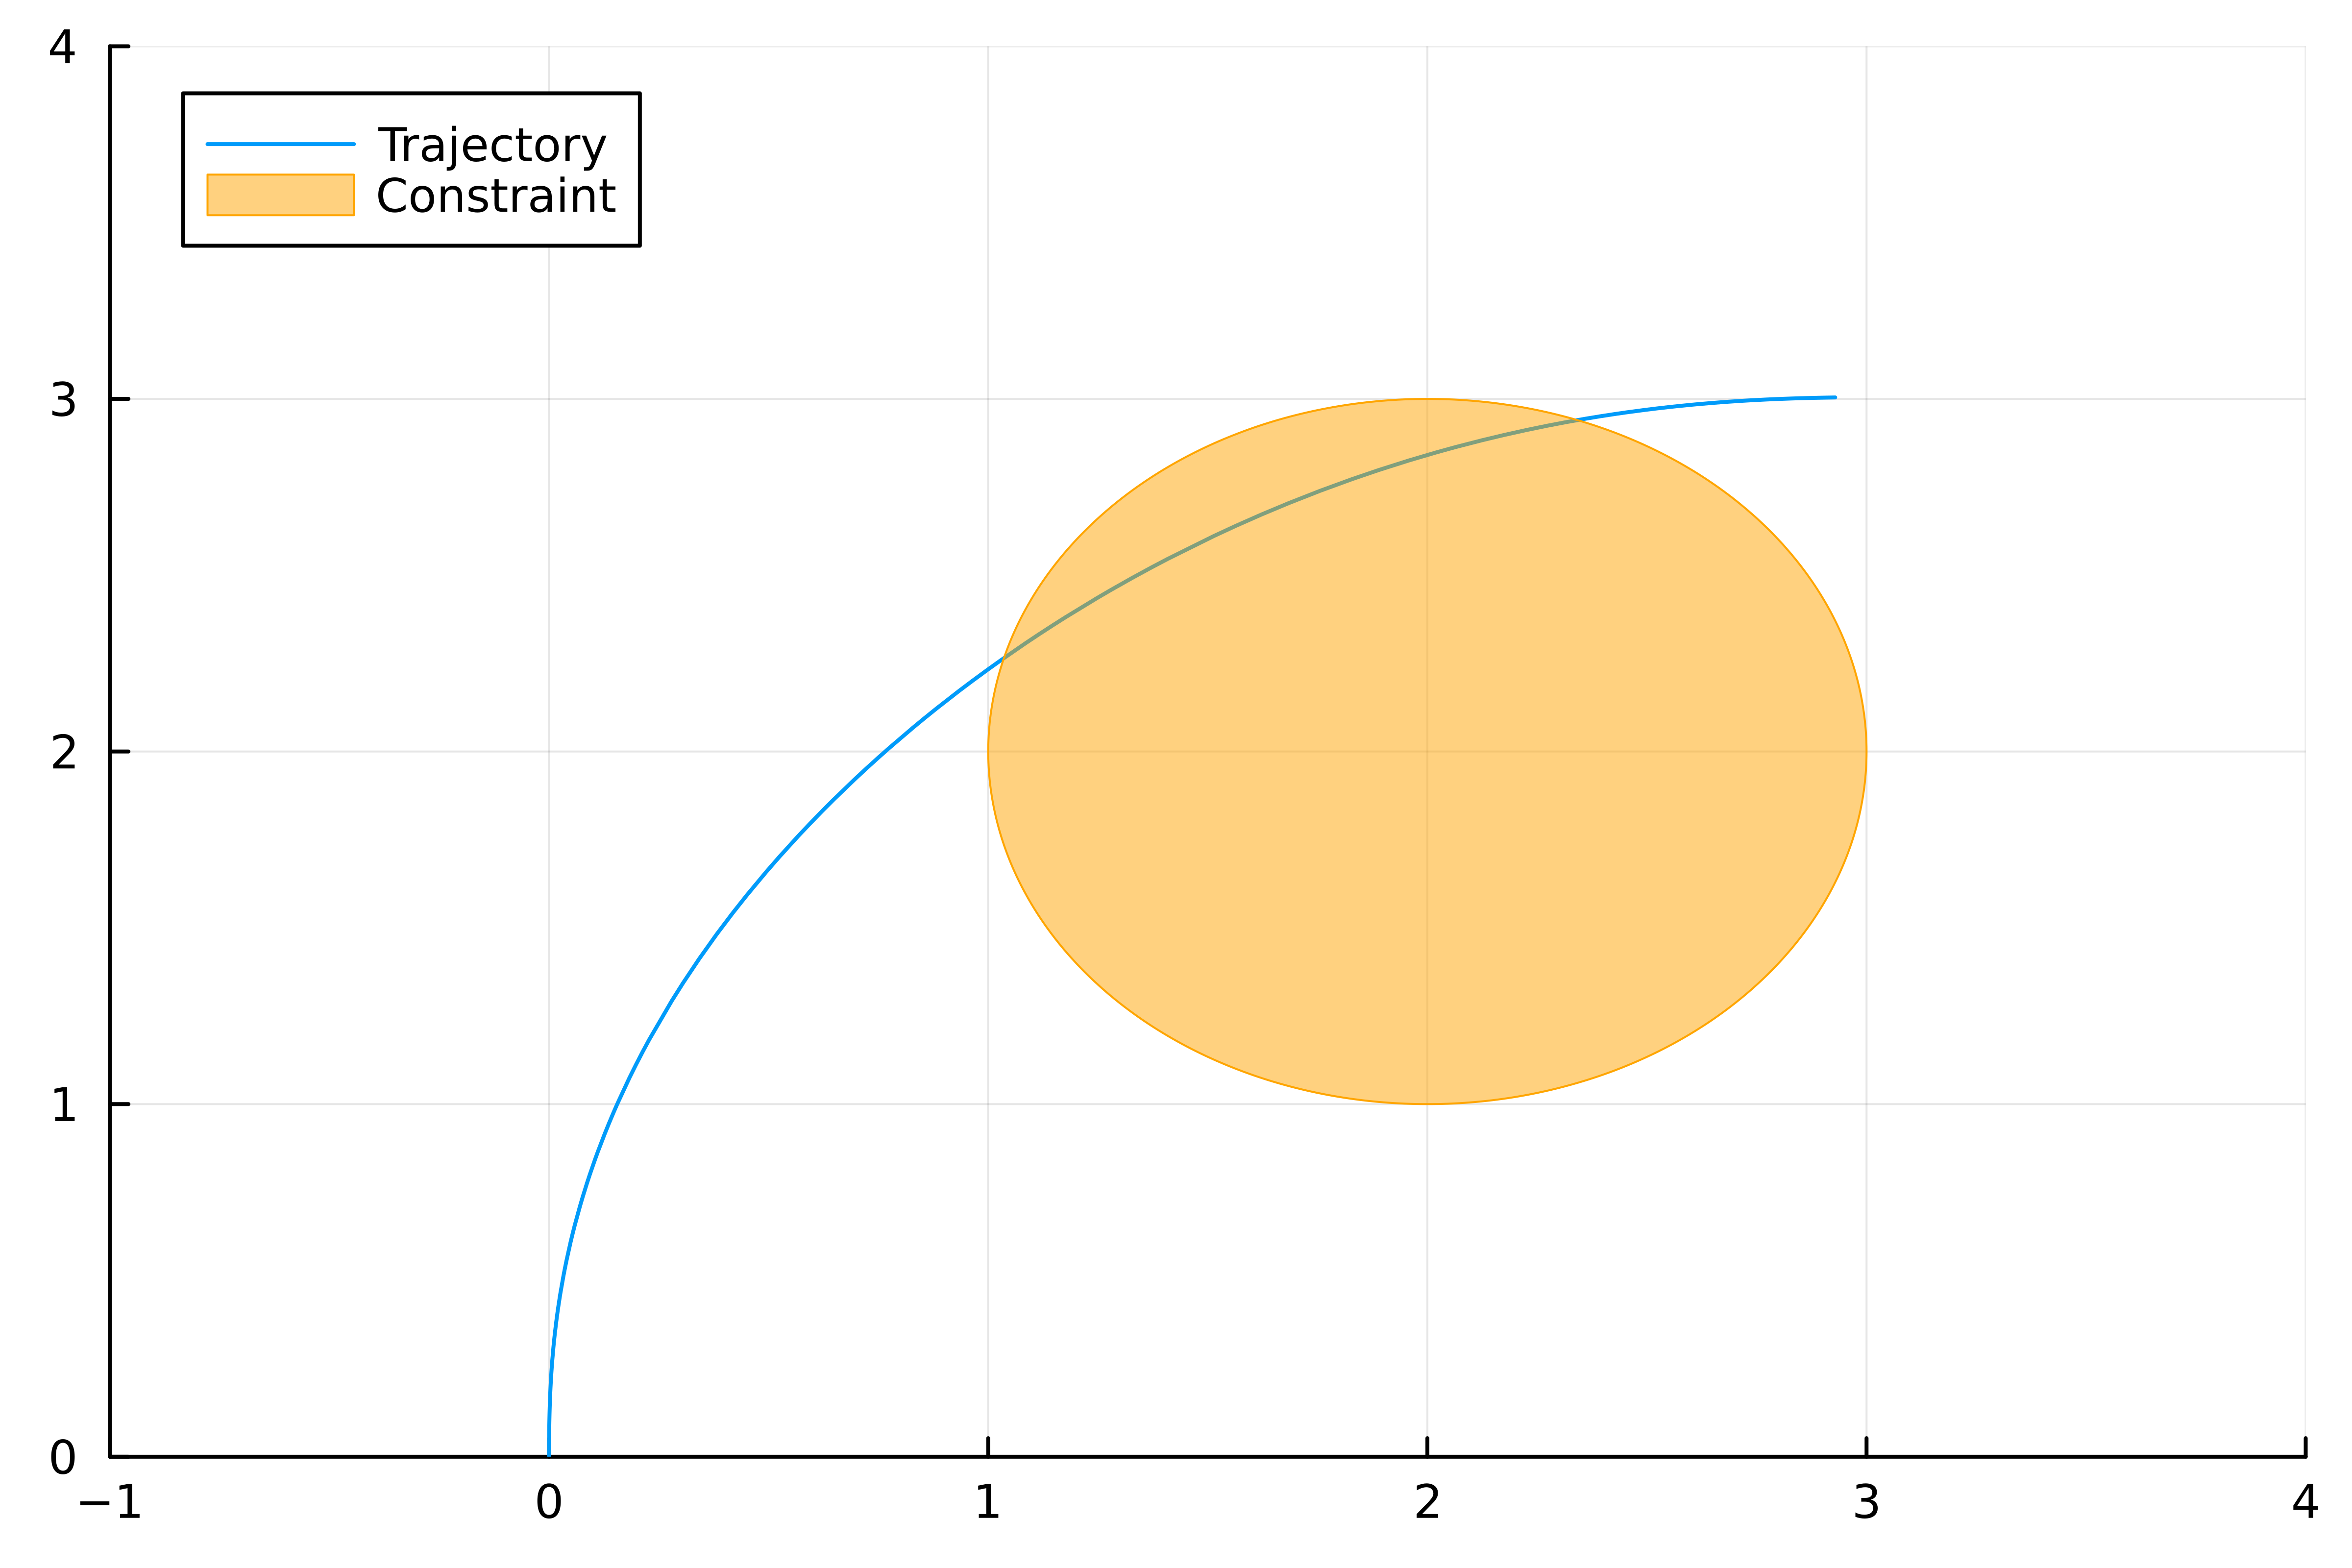

In [54]:
function circleShape(x, y, r)
    θ = LinRange(0, 2*pi, 500)
    x .+ r .* cos.(θ), y .+ r .* sin.(θ)
end


plot(X_ilqr[1,:],X_ilqr[2,:],label="Trajectory")
plot!(xlims=(-1,4),ylims=(0,4.0),label="Goal")
plot!(circleShape(2,2,1),label="Constraint", seriestype=:shape, lw=0.5,
    c=:orange, linecolor=:orange, fillalpha=0.5, fillcolor=:orange)

In [22]:
X_ilqr[:,end]

4-element Vector{Float64}:
 2.9396607001982975
 2.998837501442694
 1.5482125870051735
 0.10870313824800323